In [1]:
import pandas as pd 
import numpy as numpy

from analysis_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analysis_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analysis_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analysis_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analysis_src.multivariate_analysis import SimpleMultivariateAnalysis
from analysis_src.DataIngestor import DataIngestorFactory
#Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
#Load the data

folder_path = r"D:\Project\New folder\Data"
ingestor = DataIngestorFactory.get_data_ingestor(folder_path)
result = ingestor.ingest(folder_path)

if isinstance(result, dict):
    globals().update(result)

In [3]:
batsman_level_scorecarddf

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,wicket kind,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,7,5,1.1,caught,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.00,1.0,NaN,2021-01-01
1,8638034,TL St,4381761.0,NZ:Right-hand bat:None:,0.0,1.0,1,46,46,1.2,caught,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.00,4.0,1.0,2021-01-01
2,8638034,HR Cr,4949790.0,NZ:Right-hand bat:Right-arm offbreak:,0.0,0.0,1,9,10,12.1,caught,PF Yd,R Ra,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,90.00,NaN,NaN,2021-01-01
3,8638034,BR Hn,3834305.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,28,22,13.6,caught,HK Bt,FH An,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,127.27,3.0,NaN,2021-01-01
4,8638034,SC Kn,3776849.0,NZ:Right-hand bat:Right-arm fast-medium:,0.0,0.0,1,18,13,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.46,NaN,1.0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24478,9433633,CP Wd,2173688.0,ENG:Right-hand bat:Left-arm medium-fast:,0.0,0.0,1,1,1,20.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,2023-06-20
24479,9433633,JJ Wy,5241564.0,ENG:Right-hand bat:Right-arm offbreak:,0.0,0.0,1,37,28,6.6,stumped,TJ Sh,G Rn,1707628.0,ENG:Right-hand bat:Slow left-arm orthodox:,0.0,0.0,132.14,4.0,1.0,2023-06-20
24480,9433633,G Rn,4898074.0,SA:Right-hand bat:None:,0.0,1.0,2,1,6,1.1,caught,JA Tr,LA Dn,8833075.0,ENG:Right-hand bat:Right-arm fast-medium:,0.0,0.0,16.67,NaN,NaN,2023-06-20
24481,9433633,BJ Ws,8048074.0,ENG:Right-hand bat:None:,0.0,0.0,2,43,22,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.45,3.0,3.0,2023-06-20


In [4]:
#Step 1: Basic Data Inspection
#Initialize the data inspector with a strategy for data types inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(batsman_level_scorecarddf)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24483 entries, 0 to 24482
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match id            24483 non-null  int64  
 1   batsman             24483 non-null  object 
 2   batsman_id          24483 non-null  float64
 3   batsman_details     24483 non-null  object 
 4   is_batsman_captain  24483 non-null  float64
 5   is_batsman_keeper   24483 non-null  float64
 6   inning              24483 non-null  int64  
 7   runs                24483 non-null  int64  
 8   balls_faced         24483 non-null  int64  
 9   over_faced_first    24483 non-null  float64
 10  wicket kind         19155 non-null  object 
 11  out_by_bowler       19155 non-null  object 
 12  out_by_fielder      13838 non-null  object 
 13  bowler_id           18128 non-null  float64
 14  bowler_details      18128 non-null  object 
 15  is_bowler_keeper    

In [5]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(batsman_level_scorecarddf)


Summary Statistics (Numerical Features):
           match id    batsman_id  is_batsman_captain  is_batsman_keeper  \
count  2.448300e+04  2.448300e+04        24483.000000       24483.000000   
mean   9.105542e+06  4.129075e+06            0.113957           0.113589   
std    3.187236e+05  2.435776e+06            0.317765           0.317318   
min    8.587795e+06  3.146400e+04            0.000000           0.000000   
25%    8.778825e+06  2.231928e+06            0.000000           0.000000   
50%    9.085075e+06  3.729970e+06            0.000000           0.000000   
75%    9.407600e+06  6.095508e+06            0.000000           0.000000   
max    9.887863e+06  9.883250e+06            1.000000           1.000000   

             inning          runs   balls_faced  over_faced_first  \
count  24483.000000  24483.000000  24483.000000      24483.000000   
mean       1.490136     18.296491     14.140383          9.192093   
std        0.499913     20.251578     12.774643          6.785681 


Missing Values Count by Column:
wicket kind           5328
out_by_bowler         5328
out_by_fielder       10645
bowler_id             6355
bowler_details        6355
is_bowler_keeper      5785
is_bowler_captain     6355
strike_rate              9
Fours                10283
Sixes                15489
dtype: int64

Visualizing Missing Values...


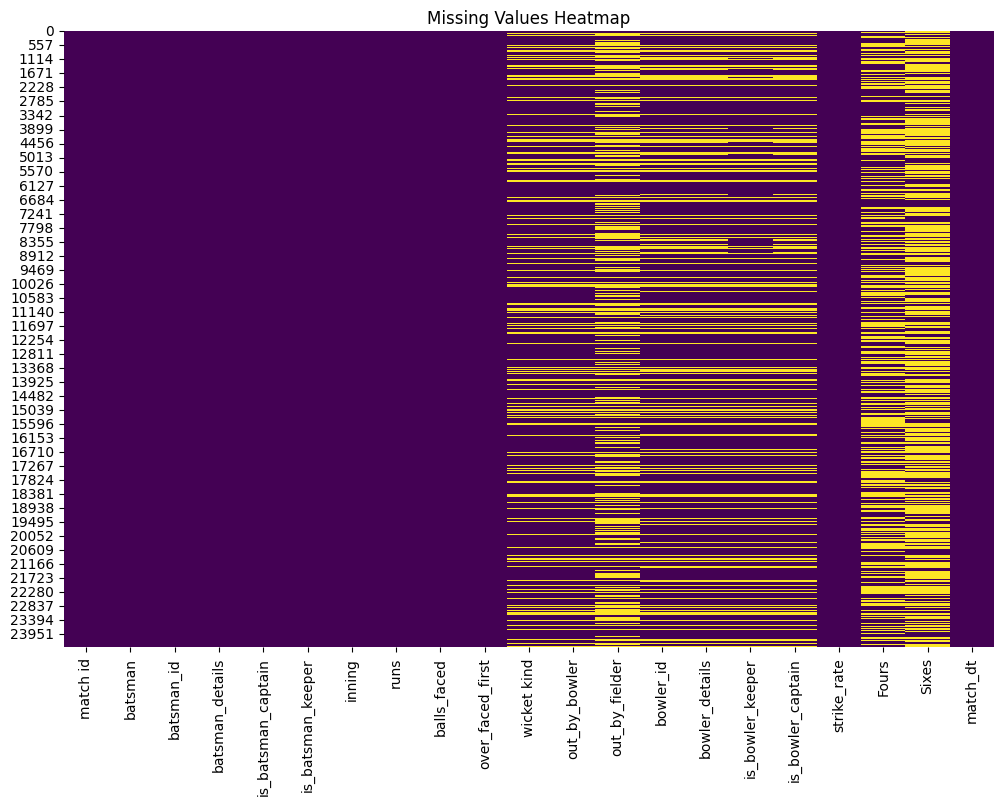

In [6]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(batsman_level_scorecarddf)

### Missing Values Insights ###

1. Random Distribution of missing data
2. Mostly in which the batsman was not out throughout the inning has missing data about his wicket and if it was a bowled then also has missing data 
3. Missing data in Fours and sixes suggests 0 boundaries were hit by the batsman

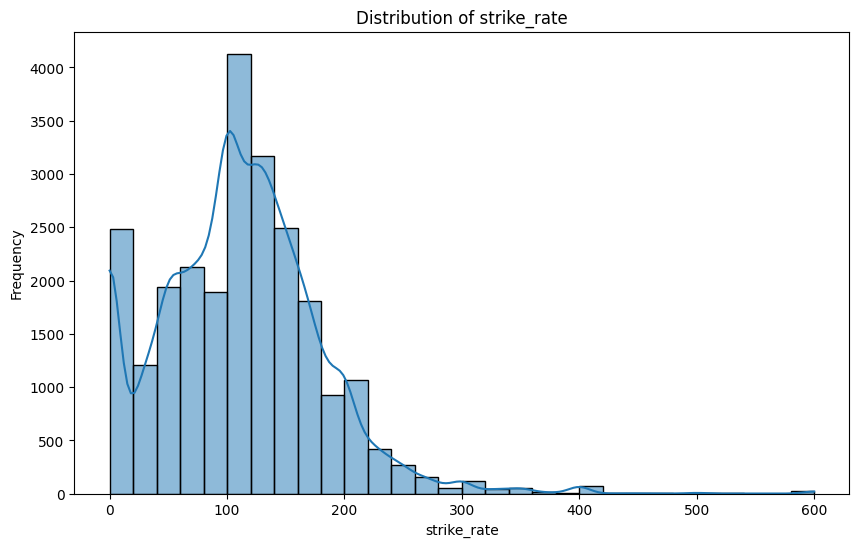

In [8]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(batsman_level_scorecarddf, 'strike_rate')

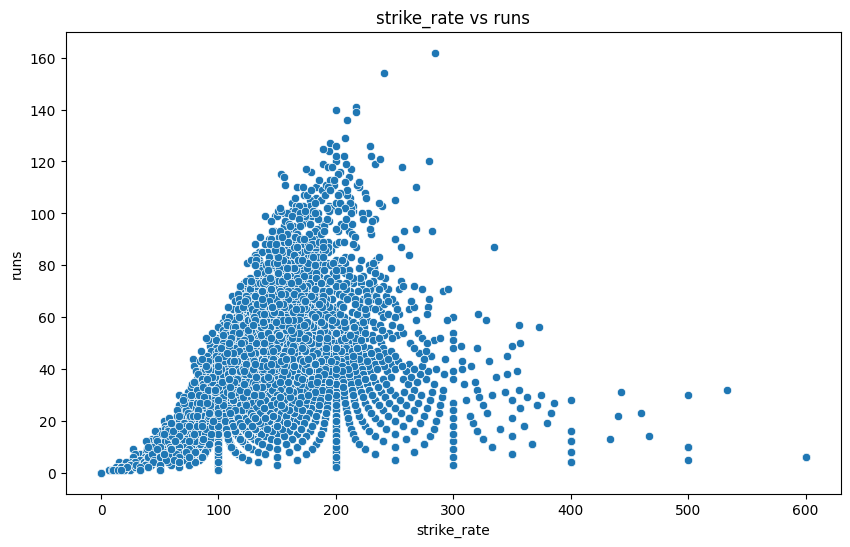

In [11]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(batsman_level_scorecarddf, 'strike_rate', 'runs')

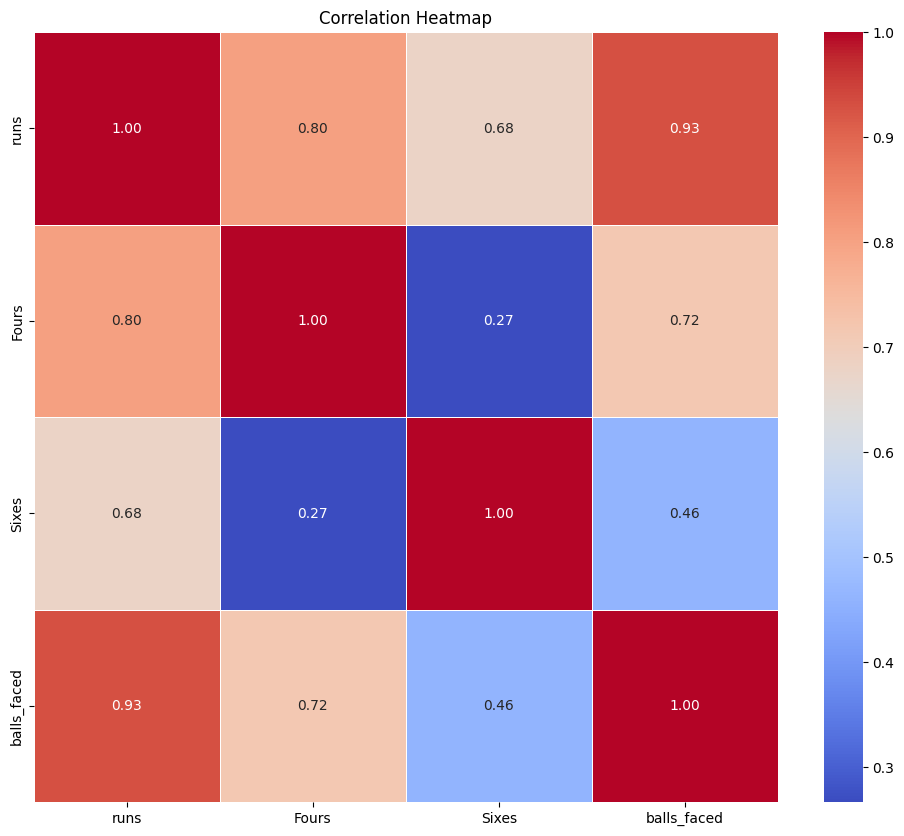

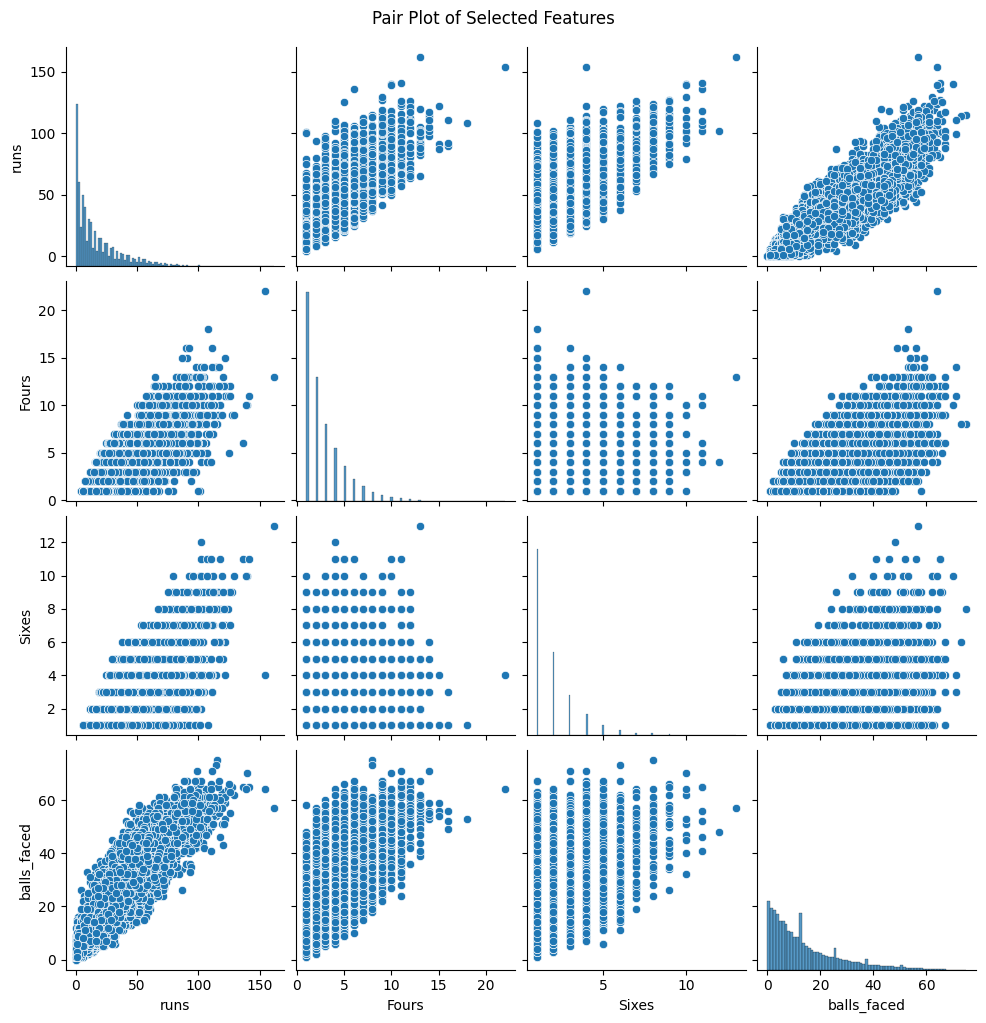

In [14]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = batsman_level_scorecarddf[['runs', 'Fours', 'Sixes', 'balls_faced']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)
